In [59]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df= pd.read_csv(r"C:\Users\PRATHEEK POOJARY\OneDrive\Desktop\Machine Learning\Datasets\customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
df.shape

(7043, 21)

In [62]:
df.drop('customerID', axis=1, inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [63]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
# coverting string to int
#pd.to_numeric(df['TotalCharges'])
# it will give error because it has " " in data

ValueError: Unable to parse string " " at position 488

In [65]:
df[pd.to_numeric(df['TotalCharges'],errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [66]:
df1= df[df['TotalCharges'] !=' ']
df1.shape

(7032, 20)

In [67]:
df1['TotalCharges']= pd.to_numeric(df1['TotalCharges'])

C:\Users\PRATHEEK POOJARY\AppData\Local\Temp\ipykernel_15840\3841125200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges']= pd.to_numeric(df1['TotalCharges'])


In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

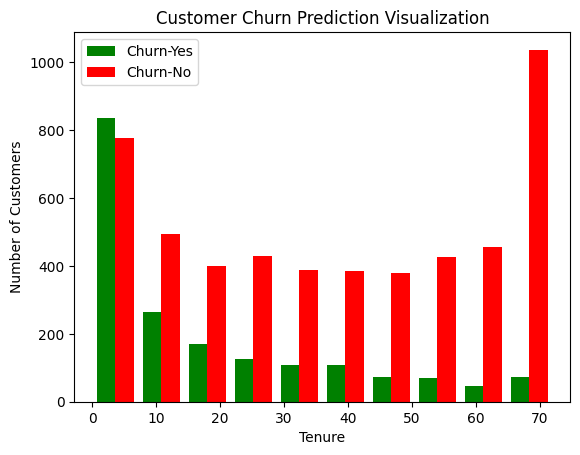

In [69]:
tenure_churn_no= df[df['Churn'] =='No'].tenure
tenure_churn_yes= df[df['Churn'] =='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green','red'],label=['Churn-Yes','Churn-No'])
plt.legend()

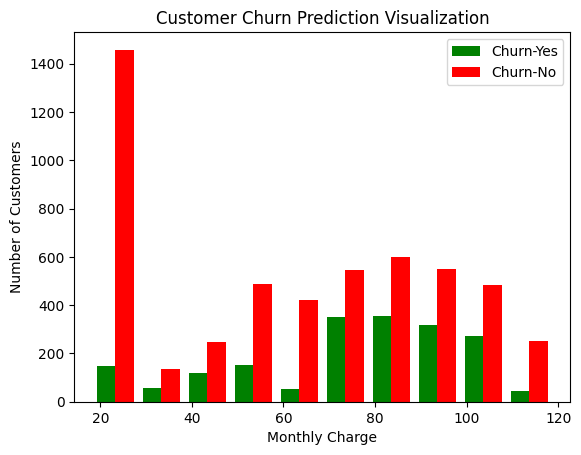

In [70]:
monthchar_churn_no= df[df['Churn'] =='No'].MonthlyCharges
monthchar_churn_yes= df[df['Churn'] =='Yes'].MonthlyCharges

plt.xlabel("Monthly Charge")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([monthchar_churn_yes, monthchar_churn_no], color=['green','red'],label=['Churn-Yes','Churn-No'])
plt.legend()

In [71]:
def unique_col_values(df1):
    for column in df1:
        if df1[column].dtype == 'object':
            print(f'{column}: {df1[column].unique()}')
unique_col_values(df1)


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [72]:
# no internet servie means no 
df1.replace('No internet service','No', inplace=True)
df1.replace('No phone service','No', inplace=True)


C:\Users\PRATHEEK POOJARY\AppData\Local\Temp\ipykernel_15840\1880175104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No', inplace=True)
C:\Users\PRATHEEK POOJARY\AppData\Local\Temp\ipykernel_15840\1880175104.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No', inplace=True)


In [73]:
unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [74]:
yes_no_columns= ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                 'StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1, 'No':0}, inplace=True)

C:\Users\PRATHEEK POOJARY\AppData\Local\Temp\ipykernel_15840\159485584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1, 'No':0}, inplace=True)


In [75]:
unique_col_values(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [76]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\PRATHEEK POOJARY\AppData\Local\Temp\ipykernel_15840\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [77]:
unique_col_values(df1)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [78]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'],dtype=int)
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [79]:
def all_col_values(df1):
    for column in df1:
            print(f'{column}: {df1[column].unique()}')
all_col_values(df2)

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]


In [80]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [81]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [82]:
df2.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,...,0.343572,0.440273,0.216155,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,...,0.474934,0.496455,0.411650,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
# now need to scale Tenure and other chargers
col_to_scale=['tenure','TotalCharges','MonthlyCharges']
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
df2[col_to_scale]= scaler.fit_transform(df2[col_to_scale])

In [84]:
df2.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,0.442560,0.903299,0.421928,0.286547,0.344852,0.343857,...,0.343572,0.440273,0.216155,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,0.345708,0.295571,0.493902,0.452180,0.475354,0.475028,...,0.474934,0.496455,0.411650,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.112676,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.394366,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.760563,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
all_col_values(df2)

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

Model 

In [86]:
x= df2.drop('Churn',axis=1)
y= df2['Churn']

In [87]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20, random_state=5)

In [89]:
x_train.shape

(5625, 26)

In [90]:
x_test.shape

(1407, 26)

In [91]:
import tensorflow as tf
from tensorflow import keras

In [92]:
model= keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_train, epochs=20)

Epoch 1/20
176/176 [==============================] - 0s 773us/step - loss: 0.4825 - accuracy: 0.7621
Epoch 2/20
176/176 [==============================] - 0s 785us/step - loss: 0.4317 - accuracy: 0.7957
Epoch 3/20
176/176 [==============================] - 0s 766us/step - loss: 0.4232 - accuracy: 0.8002
Epoch 4/20
176/176 [==============================] - 0s 764us/step - loss: 0.4190 - accuracy: 0.8034
Epoch 5/20
176/176 [==============================] - 0s 764us/step - loss: 0.4164 - accuracy: 0.8041
Epoch 6/20
176/176 [==============================] - 0s 800us/step - loss: 0.4149 - accuracy: 0.8048
Epoch 7/20
176/176 [==============================] - 0s 741us/step - loss: 0.4112 - accuracy: 0.8089
Epoch 8/20
176/176 [==============================] - 0s 762us/step - loss: 0.4116 - accuracy: 0.8055
Epoch 9/20
176/176 [==============================] - 0s 853us/step - loss: 0.4104 - accuracy: 0.8062
Epoch 10/20
176/176 [==============================] - 0s 794us/step - loss: 0.409

In [93]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 715us/step - loss: 0.4393 - accuracy: 0.7918


[0.43927299976348877, 0.7917554974555969]

In [94]:
y_pred= model.predict(x_test)
y_pred[0:10]   # ouput layer using a sigmoid function so in range between 0 to 1

44/44 [==============================] - 0s 659us/step


array([[0.18161209],
       [0.34193113],
       [0.01114429],
       [0.73372436],
       [0.5639543 ],
       [0.62059444],
       [0.09016723],
       [0.6126467 ],
       [0.46512893],
       [0.11663798]], dtype=float32)

In [95]:
y_test[0:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [96]:
# if u want to
y_predicted=[]
for val in y_pred:
    if val >0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)
y_predicted[0:10]

[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]

In [97]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
accuracy_score(y_test, y_predicted)

0.7917555081734187

In [98]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.68      0.54      0.60       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



<Axes: >

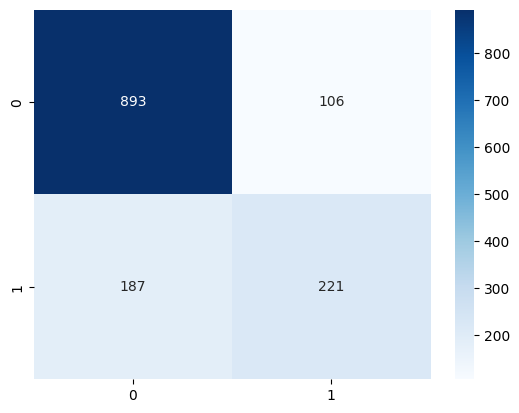

In [99]:
cm= confusion_matrix(y_test, y_predicted)
sns.heatmap(data= cm, annot=True, fmt='d', cmap='Blues')

Now implementing a SMOTE for imbalaned data set

In [100]:
y.value_counts()    # imbalance

Churn
0    5163
1    1869
Name: count, dtype: int64

In [101]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(sampling_strategy='minority')

x_sample, y_sample= smote.fit_resample(x, y)

y_sample.value_counts()      # now the data is balanced

Churn
0    5163
1    5163
Name: count, dtype: int64

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_sample, y_sample, test_size=0.20, random_state=5, stratify=y_sample)

In [103]:
y_train.value_counts()

Churn
0    4130
1    4130
Name: count, dtype: int64

In [104]:
y_test.value_counts()

Churn
1    1033
0    1033
Name: count, dtype: int64

In [105]:
model= keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_train, epochs=20)

Epoch 1/20
259/259 [==============================] - 1s 750us/step - loss: 0.5884 - accuracy: 0.6815
Epoch 2/20
259/259 [==============================] - 0s 749us/step - loss: 0.4799 - accuracy: 0.7719
Epoch 3/20
259/259 [==============================] - 0s 755us/step - loss: 0.4718 - accuracy: 0.7729
Epoch 4/20
259/259 [==============================] - 0s 752us/step - loss: 0.4672 - accuracy: 0.7743
Epoch 5/20
259/259 [==============================] - 0s 759us/step - loss: 0.4646 - accuracy: 0.7770
Epoch 6/20
259/259 [==============================] - 0s 763us/step - loss: 0.4611 - accuracy: 0.7783
Epoch 7/20
259/259 [==============================] - 0s 749us/step - loss: 0.4589 - accuracy: 0.7789
Epoch 8/20
259/259 [==============================] - 0s 756us/step - loss: 0.4563 - accuracy: 0.7817
Epoch 9/20
259/259 [==============================] - 0s 766us/step - loss: 0.4533 - accuracy: 0.7833
Epoch 10/20
259/259 [==============================] - 0s 758us/step - loss: 0.451

In [106]:
y_pred= model.predict(x_test)
y_pred

65/65 [==============================] - 0s 618us/step


array([[0.81083167],
       [0.47900912],
       [0.7738068 ],
       ...,
       [0.5400128 ],
       [0.44971636],
       [0.36997038]], dtype=float32)

In [107]:
y_pred= np.round(y_pred)
y_pred[0:5]

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [108]:
y_test[0:5]

7310    1
9578    1
9370    1
3366    0
1250    0
Name: Churn, dtype: int64

In [109]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1033
           1       0.80      0.79      0.79      1033

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



<Axes: >

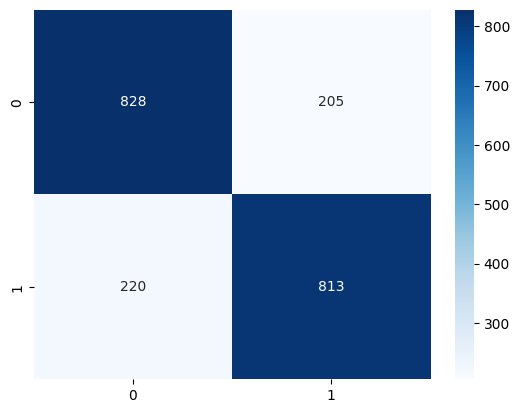

In [110]:
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(data= cm, annot=True, fmt='d', cmap='Blues')

NEXT MODEL

In [ ]:
data=pd.read_csv(r"C:\Users\PRATHEEK POOJARY\OneDrive\Desktop\Machine Learning\Datasets\Bank Customer Churn Prediction.csv")
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.drop('customer_id', axis=1, inplace=True)
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:

for col in data:
    print(f'{col} : {data[col].unique()}')

credit_score : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705

In [ ]:
data.replace({'Female':0, 'Male':1}, inplace=True)

In [ ]:
all_col_values(data)

credit_score: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [ ]:
data2= pd.get_dummies(data=data, columns=['country'], dtype=int)

In [ ]:
all_col_values(data2)

credit_score: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [ ]:
data2.describe()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [ ]:
col_to_scale=['credit_score','tenure','balance','products_number','estimated_salary']

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

data2[col_to_scale]=scaler.fit_transform(data2[col_to_scale])
data2['age']= data2['age']/ 100

In [ ]:
data2.describe()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.545700,0.389218,0.501280,0.304848,0.176733,0.70550,0.515100,0.500441,0.203700,0.501400,0.250900,0.247700
std,0.193307,0.497932,0.104878,0.289217,0.248696,0.193885,0.45584,0.499797,0.287580,0.402769,0.500023,0.433553,0.431698
min,0.000000,0.000000,0.180000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.000000,0.320000,0.300000,0.000000,0.000000,0.00000,0.000000,0.254977,0.000000,0.000000,0.000000,0.000000
50%,0.604000,1.000000,0.370000,0.500000,0.387402,0.000000,1.00000,1.000000,0.500960,0.000000,1.000000,0.000000,0.000000
75%,0.736000,1.000000,0.440000,0.700000,0.508749,0.333333,1.00000,1.000000,0.746955,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,0.920000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x= data2.drop('churn',axis=1)
y= data2['churn']

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20, random_state=2)

In [ ]:
x_train.shape

(8000, 12)

In [ ]:
x_test.shape

(2000, 12)

In [ ]:
model= keras.Sequential([
    keras.layers.Dense(6,input_shape=(12,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
250/250 [==============================] - 1s 741us/step - loss: 0.5566 - accuracy: 0.7400
Epoch 2/20
250/250 [==============================] - 0s 727us/step - loss: 0.4891 - accuracy: 0.7933
Epoch 3/20
250/250 [==============================] - 0s 730us/step - loss: 0.4826 - accuracy: 0.7933
Epoch 4/20
250/250 [==============================] - 0s 731us/step - loss: 0.4779 - accuracy: 0.7933
Epoch 5/20
250/250 [==============================] - 0s 725us/step - loss: 0.4742 - accuracy: 0.7929
Epoch 6/20
250/250 [==============================] - 0s 732us/step - loss: 0.4705 - accuracy: 0.7954
Epoch 7/20
250/250 [==============================] - 0s 766us/step - loss: 0.4672 - accuracy: 0.7976
Epoch 8/20
250/250 [==============================] - 0s 773us/step - loss: 0.4637 - accuracy: 0.7984
Epoch 9/20
250/250 [==============================] - 0s 724us/step - loss: 0.4598 - accuracy: 0.7993
Epoch 10/20
250/250 [==============================] - 0s 725us/step - loss: 0.455

In [ ]:
yp=model.predict(x_test)
yp[0:10]

63/63 [==============================] - 0s 642us/step


array([[0.13937427],
       [0.5832002 ],
       [0.1739159 ],
       [0.03590549],
       [0.04688935],
       [0.01852622],
       [0.3406709 ],
       [0.06835071],
       [0.7778971 ],
       [0.04387578]], dtype=float32)

In [ ]:
y_test[0:10]

7878    1
3224    1
1919    1
4432    0
4835    0
4895    0
7269    1
1451    0
1742    1
4628    0
Name: churn, dtype: int64

In [ ]:
yp_pred=[]
for val in yp:
    if val >0.5:
        yp_pred.append(1)
    else:
        yp_pred.append(0)
yp_pred[0:10]

[0, 1, 0, 0, 0, 0, 0, 0, 1, 0]

In [ ]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 727us/step - loss: 0.4064 - accuracy: 0.8255


[0.40640950202941895, 0.8255000114440918]

In [ ]:
accuracy_score(y_test, yp_pred)

0.8255

<Axes: >

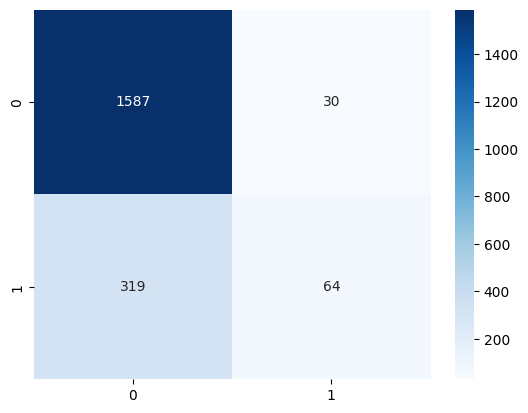

In [ ]:
cm= confusion_matrix(y_test, yp_pred)
sns.heatmap(data= cm, annot=True, fmt='d',cmap='Blues')

In [ ]:
print(classification_report(y_test,yp_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1617
           1       0.68      0.17      0.27       383

    accuracy                           0.83      2000
   macro avg       0.76      0.57      0.58      2000
weighted avg       0.80      0.83      0.78      2000

